# Segunda tarea de Computación en Física (Amoeba)

In [1]:
import pandas as pd # Importamos pandas para cargar el arhcivo que queremos

# Datos con Ruido

In [2]:
# De esta forma cargamos los datos sin ruido del problema
df1=pd.read_csv('Data_Planckian.txt', header=None, sep=(' '))
df1

,0,1
0,1.000000e+00,2.904756e-28
1,1.001001e+12,2.878117e-04
2,2.002002e+12,1.122512e-03
3,3.003003e+12,2.483194e-03
4,4.004004e+12,4.410241e-03
...,...,...
995,9.959960e+14,2.334788e-04
996,9.969970e+14,2.300566e-04
997,9.979980e+14,2.268607e-04
998,9.989990e+14,2.220407e-04


In [3]:
import numpy as np # Importamos numpy para tratar los datos como arrays

In [4]:
# Convertimos los datos cargados con pandas a arrays de numpy
data=np.array(df1)
data

array([[1.00000000e+00, 2.90475571e-28],
       [1.00100100e+12, 2.87811714e-04],
       [2.00200200e+12, 1.12251208e-03],
       ...,
       [9.97997998e+14, 2.26860709e-04],
       [9.98998999e+14, 2.22040656e-04],
       [1.00000000e+15, 2.18445366e-04]])

In [5]:
# Definimos la variable frequency que serán los datos de la primera columna de DataFrame
frequency=data[:,0]
frequency[:5] # Muestra los 5 primero valores

array([1.000000e+00, 1.001001e+12, 2.002002e+12, 3.003003e+12,
       4.004004e+12])

In [6]:
# Hacemos lo mismo con la segunda columna del DataFrame
intensity=data[:,1]
intensity[:5]

array([2.90475571e-28, 2.87811714e-04, 1.12251208e-03, 2.48319412e-03,
       4.41024051e-03])

In [7]:
# Normalizamos los datos de intensidad para que el valor máximo sea 1

intensity_normalized = intensity / np.max(intensity)
intensity_normalized

array([2.90475571e-28, 2.87811714e-04, 1.12251208e-03, 2.48319412e-03,
       4.41024051e-03, 6.80633280e-03, 9.62330589e-03, 1.30835144e-02,
       1.67404746e-02, 2.09164860e-02, 2.53664086e-02, 3.02115804e-02,
       3.55095525e-02, 4.11848780e-02, 4.73735752e-02, 5.37239167e-02,
       6.02975297e-02, 6.67396863e-02, 7.36300982e-02, 8.17335723e-02,
       8.85951013e-02, 9.68275778e-02, 1.05606835e-01, 1.12617445e-01,
       1.22535210e-01, 1.32146409e-01, 1.39629821e-01, 1.49853112e-01,
       1.56683723e-01, 1.65723623e-01, 1.75905216e-01, 1.86169441e-01,
       1.97089580e-01, 2.06802929e-01, 2.13993132e-01, 2.22809668e-01,
       2.35406872e-01, 2.47078166e-01, 2.52759860e-01, 2.64427824e-01,
       2.73587395e-01, 2.83006035e-01, 2.93328854e-01, 3.05907766e-01,
       3.13857360e-01, 3.24347104e-01, 3.37123948e-01, 3.48436234e-01,
       3.54823094e-01, 3.67362073e-01, 3.80987786e-01, 3.85957000e-01,
       3.96312483e-01, 4.04305927e-01, 4.14454997e-01, 4.28270952e-01,
      

In [8]:
import matplotlib.pyplot as plt # Importamos matplotlib para ver el comportamiento de nuestros datos

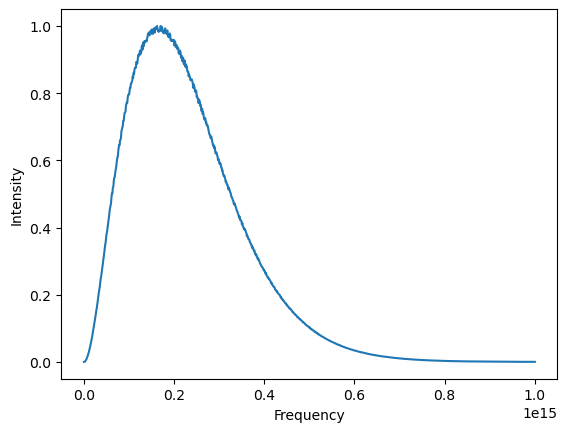

In [9]:
# Creamos la visualización
plt.plot(frequency,intensity)
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.show()

In [10]:
# Definimos las constantes que utilizaremos
h=6.67e-34 #Planck Constant
c=3e8 #Speed of light constant
kB=1.38e-23 #Boltzman constant

# Funciones vistas en clase

In [11]:
def planckian(nu, p):
    w1 = p[0]
    w2 = p[1]
    
    # Normalizar los pesos para que su suma sea 1
    dummy = w1 + w2
    w1 = w1 / dummy
    w2 = w2 / dummy
    
    # Calculamos las temperaturas T1 y T2, asegurando que estén en el rango [1000, 4000]
    T1 = 1000 * (1 + 3 * p[2])
    T2 = 1000 * (1 + 3 * p[3])
    
    # Calculamos la intensidad usando la ley de Planck modificada
    y = w1 / (np.exp(h * nu / (kB * T1)) - 1) + w2 / (np.exp(h * nu / (kB * T2)) - 1)
    
    # Multiplicar por nu^3 para completar la expresión de la intensidad
    return y * nu**3

In [12]:
def scale_Factor(data, model):
    # Calcular el factor de escala para ajustar la magnitud del modelo
    return np.sum(data * model) / np.sum(model * model)

In [13]:
# Definimos nuestra loss function que nos calcula el error cuadrático entre los datos y el modelo.
def loss_Function(data, model):
    A = scale_Factor(data, model)  # Factor de escala para ajustar la magnitud del modelo
    return np.sum((data - A*model) ** 2)

In [14]:
# Definimos una función para calcular el error del modelo que se usará en la optimización
def model_error(p, nu, data):
    # Calcula la intensidad usando la función planckian con los parámetros actuales
    model = planckian(nu, p)
    # Calcula la función de pérdida para medir la discrepancia entre los datos y el modelo
    loss = loss_Function(data, model)
    return loss

In [15]:
from scipy.optimize import minimize # Importamos la función minimize de scipy

In [16]:
import random as rd # Para generar los parametros iniciales de manera aleatoria

In [17]:
# Valores iniciales para los parámetros que vamos a calcular
w1_guess=rd.random()
w2_guess=rd.random()
T1_guess=rd.random()
T2_guess=rd.random()
p_guess = [w1_guess, w2_guess, T1_guess, T2_guess]

In [18]:
# Ejecutamos la optimización utilizando el método Nelder-Mead de la función de scipy
result = minimize(model_error, p_guess, args=(frequency, intensity_normalized), method='Nelder-Mead')

# Extraemos los parámetros optimizados
optimized_p = result.x
print("Parámetros optimizados:", optimized_p)

Parámetros optimizados: [0.2584523  0.18585637 0.06353276 0.64710659]


In [19]:
# Calcular la intensidad ajustada con los parámetros optimizados y normalizar
I_optimized = planckian(frequency, optimized_p)
I_optimized_normalized = I_optimized / np.max(I_optimized)

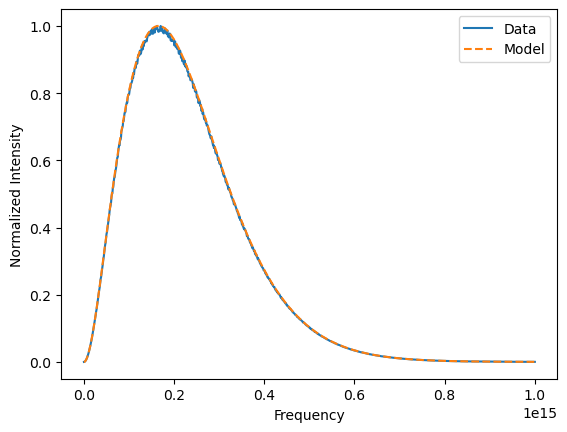

In [20]:
# Graficamos los resultados normalizados para comparar
plt.plot(frequency, intensity_normalized, label='Data')
plt.plot(frequency, I_optimized_normalized, label='Model', linestyle='--')
plt.xlabel('Frequency')
plt.ylabel('Normalized Intensity')
plt.legend()
plt.show()

In [21]:
# Extraemos los parámetros optimizados
w1, w2, T1, T2 = optimized_p

# Normalizamos los pesos w1 y w2 (obtendremos los valores deseados)
dummy = w1 + w2
w1 = w1 / dummy
w2= w2 / dummy

# Calcular las temperaturas T1 y T2 (obtendremos los valores deseados)
T1 = 1000 * (1 + 3 * T1)
T2 = 1000 * (1 + 3 * T2)

# Mostrar los resultados
print("Parameters")
print(f"w1 = {w1}, w2 = {w2}")
print(f"T1 = {T1} K, T2 = {T2} K")

Parameters
w1 = 0.5816953848892474, w2 = 0.4183046151107525
T1 = 1190.5982670801518 K, T2 = 2941.319769519296 K
